In [ ]:
!pip install mediapipe opencv-python

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [ ]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
#kamerayı açıyor
#qye basınca kapat        
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
## mediapipe kullanımı
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # open cv BGR formatında ama mediapipe RGB istiyor
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # tam tersi
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # eklem noktalarını çiz. ilki noktalar için ikincisi bağlantı çizgileri için
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [ ]:
mp_drawing.DrawingSpec??

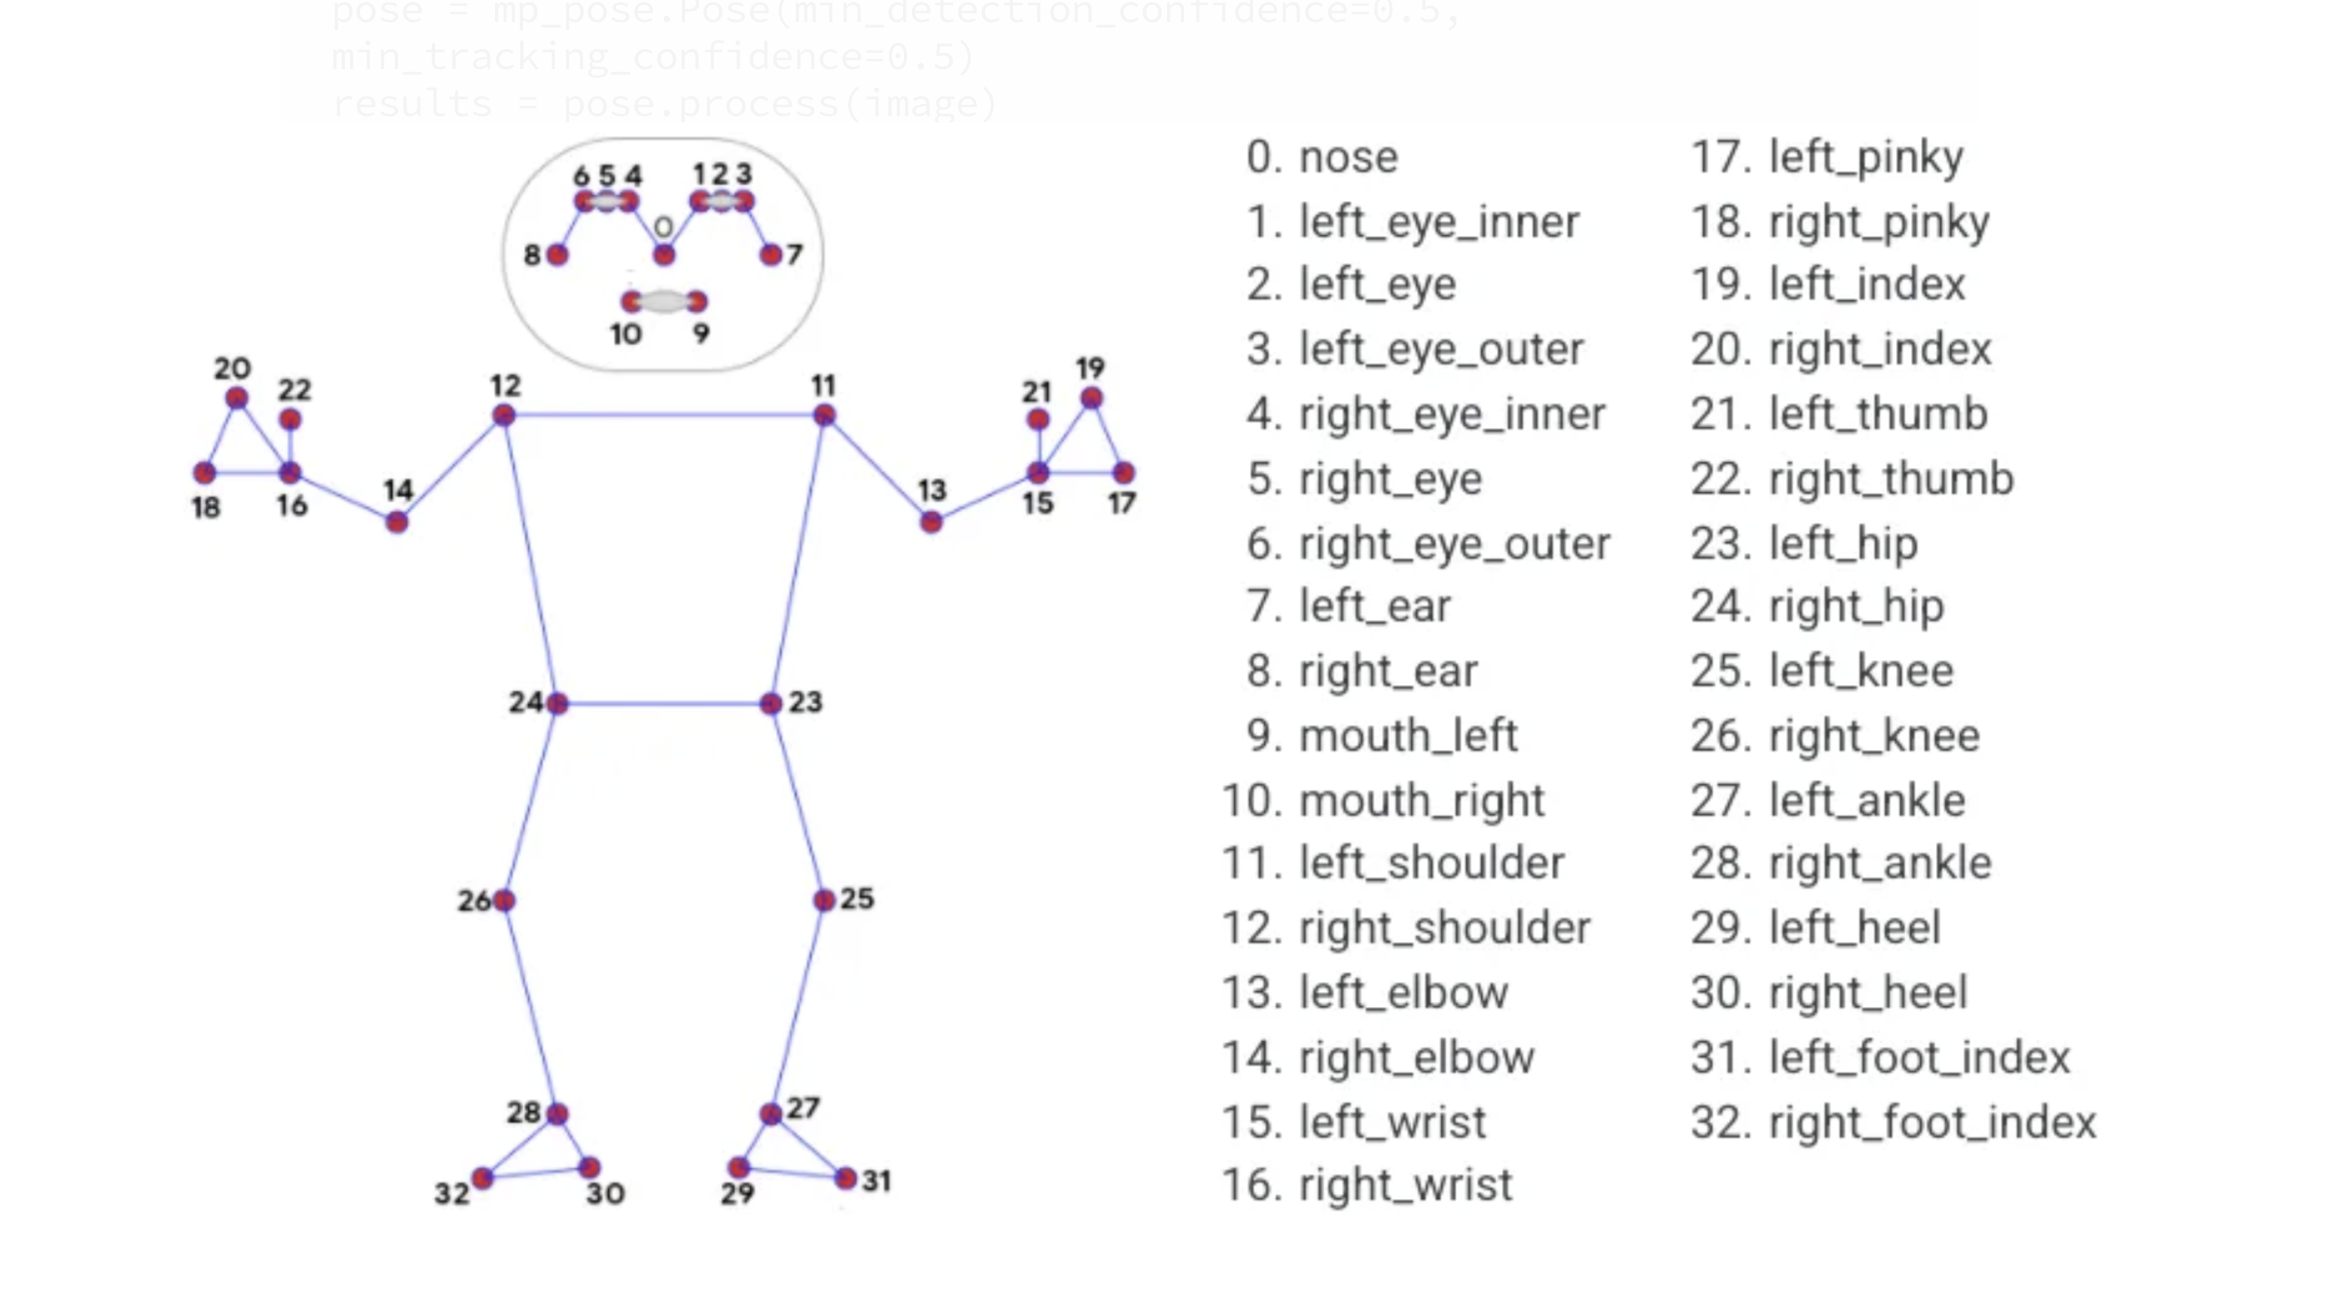

In [ ]:
# cap = cv2.VideoCapture(0)
## mediapipe kullanımı
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # open cv BGR formatında ama mediapipe RGB istiyor
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # tam tersi
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #tüm eklemlerin konum bilgisi
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # eklem noktalarını çiz. ilki noktalar için ikincisi bağlantı çizgileri için
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [ ]:
len(landmarks)

In [ ]:
for lndmark in mp_pose.PoseLandmark:
    print(lndmark)

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].visibility

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value]

In [ ]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

Açıları Hesapla 
dirsek ne kadar bükülmüş

In [ ]:
def calculate_angle(a,b,c):
    a = np.array(a) #ilk
    b = np.array(b) #orta
    c = np.array(c) #son
    #0x,1y,2z
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
    
    return angle

In [ ]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [ ]:
shoulder, elbow, wrist

In [ ]:
calculate_angle(shoulder, elbow, wrist)

In [ ]:
tuple(np.multiply(elbow, [640, 480]).astype(int))

In [ ]:
cap = cv2.VideoCapture(0)
## mediapipe kullanımı
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # open cv BGR formatında ama mediapipe RGB istiyor
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # tam tersi
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #tüm eklemlerin konum bilgisi
        try:
            landmarks = results.pose_landmarks.landmark
            #koordinatları al
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            #açıyı hesapla
            angle = calculate_angle(shoulder, elbow, wrist)
            
            #görselleştir
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                       )
            
           
        except:
            pass
        
        # eklem noktalarını çiz. ilki noktalar için ikincisi bağlantı çizgileri için
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Kaç kere kıvrıldığını bulmak için

In [ ]:
cap = cv2.VideoCapture(0)

#sayaç
counter = 0
stage = None
## mediapipe kullanımı
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # open cv BGR formatında ama mediapipe RGB istiyor
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # tam tersi
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #tüm eklemlerin konum bilgisi
        try:
            landmarks = results.pose_landmarks.landmark
            #koordinatları al
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            #açıyı hesapla
            angle = calculate_angle(shoulder, elbow, wrist)
            
            #görselleştir
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                       )
            #kıvrım sayma
            if angle > 160:
                stage = "down"
            if angle < 30 and stage == 'down':
                stage= "up"
                counter +=1
                print(count)
            
           
        except:
            pass
        
        #sayıyı görsele yazdırmak için
        #köşeye yazdırmak için kutu çıkartıyo
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,0), 1, cv2.LINE_AA)
            
        cv2.putText(image, str(counter), (10,60),
                    cv2.FONT_HERSHEY_SIMPLEX,2, (255,255,255), 2, cv2.LINE_AA)
                   
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            
        cv2.putText(image, stage, (60,60),
                    cv2.FONT_HERSHEY_SIMPLEX,2, (255,255,255), 2, cv2.LINE_AA)         

        
        # eklem noktalarını çiz. ilki noktalar için ikincisi bağlantı çizgileri için
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()